In [1]:
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display
from numpy import pi
import numpy as np

In [2]:
xs, xi, ys,yi, xj, yj, r, th, q, q1, qi,eps0, U = sym.symbols("x x_i  y y_i x_j y_j r theta q q_1 q_i epsilon_0 U", real=True, positive=True)

The value for $\epsilon_0$

In [3]:
eps0_val = 8.8541878128e-12

In [4]:
# elementary charge in coulombs
elem_charge = 1.60218e-19

In [5]:
e1 = -qi/(4*sym.pi*eps0 * sym.sqrt((xj-xi+r*sym.cos(th))**2+(yj-yi+r*sym.sin(th))**2))
e1

-q_i/(4*pi*epsilon_0*sqrt((r*sin(theta) - y_i + y_j)**2 + (r*cos(theta) - x_i + x_j)**2))

In [6]:
e2 = e1.subs([(xi, xj), (yi,yj)])
e2

-q_i/(4*pi*epsilon_0*sqrt(r**2*sin(theta)**2 + r**2*cos(theta)**2))

In [7]:
sym.simplify(e2)

-q_i/(4*pi*epsilon_0*r)

In [86]:
charges =[(-5, 0, elem_charge), (5, 0, -elem_charge) ]

In [87]:
expr = None
for charge in charges:
    x,y, q = charge 
    xx, yy, _ = charges[0]
    ex = e1.subs([(eps0, eps0_val ), (xi, x), (yi, y), (xj, xx), (yj, yy), (qi, q)])
    if expr:
        expr = expr + ex
    else:
        expr = ex
display((expr))



4.52379154890926e-9/(pi*sqrt(r**2*sin(theta)**2 + (r*cos(theta) - 10)**2)) - 4.52379154890926e-9/(pi*sqrt(r**2*sin(theta)**2 + r**2*cos(theta)**2))

In [98]:
fexpr = sym.lambdify([th, r], expr)
potentials = []
for rr in np.linspace(1, 6, 10):
    potentials.append((rr, fexpr(pi/2, rr)))
    #print (rr, f(rr, pi/2 ))
display(potentials)

[(1.0, -1.2966854442641348e-09),
 (1.5555555555555556, -7.834078724500479e-10),
 (2.111111111111111, -5.411985388632747e-10),
 (2.666666666666667, -4.008531417970741e-10),
 (3.2222222222222223, -3.098291875021055e-10),
 (3.7777777777777777, -2.4646293894691007e-10),
 (4.333333333333334, -2.0017517447414152e-10),
 (4.888888888888889, -1.6517438697462444e-10),
 (5.444444444444445, -1.3801606071754804e-10),
 (6.0, -1.1651839479395206e-10)]

In [89]:
from scipy.optimize import root_scalar
from matplotlib.collections import LineCollection

In [90]:
def fn(r, theta, potential_num):
    return fexpr(theta, r) - potentials[potential_num][1]

In [91]:
fn(1,0, 0)

1.6714268217467587e-11

In [99]:
results = []
for ellipse in np.arange(0,8):
    subresults = []
    for theta in np.linspace(0, 2*pi, 36):
        res = root_scalar(fn,args=(theta, ellipse), method='secant', x0=.1, x1=.2, rtol=0.01 )
        subresults.append((res.root*np.cos(theta)-5, res.root*np.sin(theta)))
    results.append(subresults)

In [ ]:
tot = 0
for charge in charges:
    print (charge)

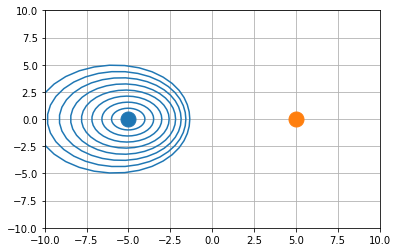

In [100]:
fig, ax = plt.subplots()

for charge in charges:
    ax.plot(int(charge[0]), int(charge[1]), 'o', ms=15)

lines = LineCollection(results)
ax.add_collection(lines)
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))


ax.grid()